In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Load your dataset

In [2]:
df = pd.read_csv('./tvmarketing.csv')
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [3]:
X = df[['TV']]
y = df['Sales']

# Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Standardize the features using StandardScaler

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Simple Linear Regression model

In [6]:
slr_model = LinearRegression()

# Fit the model to the training data

In [7]:
slr_model.fit(X_train_scaled, y_train)

LinearRegression()

# Make predictions on the test set

In [8]:
y_pred = slr_model.predict(X_test_scaled)

# Comparing Actual and Predicted Values

In [9]:
dict=pd.DataFrame({'predicted_values: ' : y_pred,'actual_values : ':y_test})
print('comparision: \n',dict)

comparision: 
      predicted_values:   actual_values : 
95            14.817854              16.9
15            16.307544              22.4
30            20.832305              21.4
158            7.782431               7.3
128           17.463099              24.7
115           10.724686              12.6
69            17.300671              22.3
170            9.559850               8.4
174           17.560555              11.5
45            15.365466              14.9
66             8.701306               9.5
182            9.847578               8.7
165           18.122089              11.9
78             7.490062               5.3
186           13.713348              10.3
177           15.138068              11.7
56             7.578237               5.5
152           16.409642              16.6
82            10.733967              11.3
68            18.256672              18.9
124           17.890050              19.7
16            10.385909              12.5
148            9.00

# Visualize the model

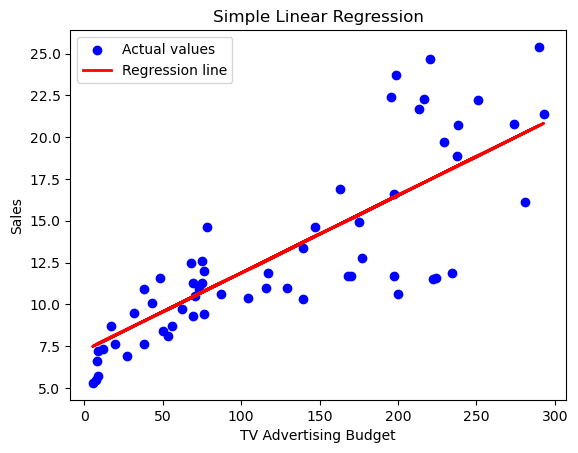

In [10]:
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Residual Analysis

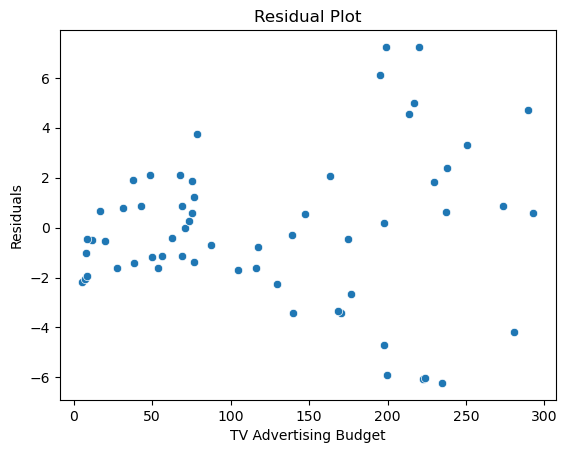

In [11]:
residuals = y_test - y_pred
sns.scatterplot(x=X_test.squeeze(), y=residuals)
plt.title('Residual Plot')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Residuals')
plt.show()

# Evaluate the model

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

Mean Squared Error: 8.970991242413614
Root Mean Squared Error: 2.9951613049072354
R-squared: 0.6714477229302764


# Cross-validation

In [13]:
cv_scores = cross_val_score(slr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {np.mean(cv_rmse_scores)}')



Cross-validated RMSE: 3.3339650297530286
